In [1]:
cd /kaggle/input/trainXX

/kaggle/input/trainXX


In [2]:
path = '/kaggle/input/trainXX'

In [3]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,LeakyReLU,Conv2DTranspose
from keras.layers import Activation
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.initializers import RandomNormal
from keras.utils import to_categorical
from keras.layers import Input, Dense
from keras.layers import Concatenate

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [4]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,)
                                   
test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
training_set = train_datagen.flow_from_directory(path,
                                                target_size=(28,56),
                                                class_mode = 'categorical',
                                                shuffle=True,color_mode='grayscale')

Found 2980 images belonging to 10 classes.


In [6]:

# define the discriminator model
def define_discriminator(image_shape=(28,28,1,)):
    in_image = Input(shape=image_shape)
    out_image = Input(shape=image_shape)
    init = RandomNormal(stddev=0.02)
    merged = Concatenate(axis=-1)([in_image, out_image])
    
    
    d = Conv2D(64, (3,3), kernel_initializer=init)(merged)
    d= LeakyReLU(alpha=0.2)(d)
    d = Conv2D(128, (3,3), kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    d = Dropout(0.5)(d)
    d = MaxPooling2D(pool_size=2,strides=2)(d)
  
    d = Conv2D(196, (3,3), kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    d = Dropout(0.5)(d)
    d = MaxPooling2D(pool_size=2,strides=2)(d)
  
    d = Conv2D(256, (3,3), kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    d = Dropout(0.5)(d)
    d = MaxPooling2D(pool_size=2,strides=2)(d)
  
    d = Flatten()(d)
    d = Dense(256, activation='relu')(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    d = Dropout(0.5)(d)
  
    d = Dense(128)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    d = Dropout(0.5)(d)
  
    d = Dense(64)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    d = Dropout(0.5)(d)
    
    d = Dense(32)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    
    d = Dense(1)(d) 
    patch_out = Activation('sigmoid')(d)
  
    model = Model([in_image, out_image], patch_out)
    print('Compiling Discriminator')
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'], loss_weights=[0.5])
    model.summary()
    return model

In [7]:
def define_generator(image_shape=(28,28,1,)):
    in_image = Input(shape=image_shape)
    g = Conv2D(64, kernel_size=3, activation='relu',padding='same', input_shape=(28,28,1))(in_image)
    g = BatchNormalization()(g)
    
    g = Conv2D(128, kernel_size=3, strides=(2, 2))(g)
    g = BatchNormalization()(g)
    g = LeakyReLU(alpha=0.2)(g)
    g = Dropout(0.25)(g)
    
    g = Conv2D(196, kernel_size=3, strides=(2, 2))(g)
    g = BatchNormalization()(g)
    g = LeakyReLU(alpha=0.2)(g)
    g = Dropout(0.25)(g)
    
    g = Conv2D(256, kernel_size=3, strides=(2, 2))(g)
    g = BatchNormalization()(g)
    g = LeakyReLU(alpha=0.2)(g)
    g = Dropout(0.25)(g)
    
    g = Conv2D(512, kernel_size=2, strides=(2, 2))(g)
    g = BatchNormalization()(g)
    g = LeakyReLU(alpha=0.2)(g)
    g = Dropout(0.25)(g)
    
    g = Conv2DTranspose(512, kernel_size=3, strides=(2, 2))(g)
    g = BatchNormalization()(g)
    g = LeakyReLU(alpha=0.2)(g)
    g = Dropout(0.25)(g)
    
    g = Conv2DTranspose(256, kernel_size=2, strides=(2, 2))(g)
    g = BatchNormalization()(g)
    g = LeakyReLU(alpha=0.2)(g)
    g = Dropout(0.25)(g)
    
    g = Conv2DTranspose(128, kernel_size=3, strides=(2, 2))(g)
    g = BatchNormalization()(g)
    g = LeakyReLU(alpha=0.2)(g)
    g = Dropout(0.25)(g)
    
    g = Conv2DTranspose(1, kernel_size=4, strides=(2, 2))(g)
    out_image = Activation('tanh')(g)
    model = Model(in_image, out_image)
    print('Compiling generator')
    model.summary()
    return model

In [8]:
discriminator = define_discriminator()

Compiling Discriminator
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 28, 28, 2)    0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 26, 26, 64)   1216        con

In [9]:
generator = define_generator()

Compiling generator
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
batch_normalization_9 (Batch (None, 13, 13, 128)       512       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 13,

In [10]:
def define_gan(g_model, d_model, image_shape=(28,28,1,)):
    # make weights in the discriminator not trainable
    d_model.trainable = False
    # define the source image
    in_src = Input(shape=image_shape)
    # connect the source image to the generator input
    gen_out = g_model(in_src)
    # connect the source input and generator output to the discriminator input
    dis_out = d_model([in_src, gen_out])
    # src image as input, generated image and classification output
    model = Model(in_src, [dis_out, gen_out])
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt, loss_weights=[1,100])
    return model

In [11]:
def generate_fake_samples(g_model, image_hand, patch_shape=1):
    # generate fake instance
    X = g_model.predict(image_hand)
    # create 'fake' class labels (0)
    y = np.zeros((len(X), patch_shape))
    return X, y

In [12]:
def generat_real_samples( patch_shape=1):
    X,y = training_set.next()
    real_print,real_hand = X[:,:,:28],X[:,:,28:]
    real_hand = np.reshape(real_hand,[-1, 28, 28, 1])
    real_print = np.reshape(real_print,[-1, 28, 28, 1])
    real_label = np.ones((len(X), patch_shape))
    return [real_hand,real_print],real_label

In [13]:
I = training_set.n//training_set.batch_size
I

93

In [14]:
gan_model = define_gan(generator,discriminator)

step 1: real_loss: [0.33731762, 0.640625]---fake_loss: [0.3559209, 0.59375]---GAN_LOSS: 8.987117767333984


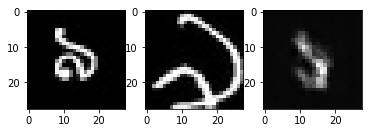

step 2: real_loss: [0.3392593, 0.625]---fake_loss: [0.36268175, 0.46875]---GAN_LOSS: 8.475298881530762
step 3: real_loss: [0.33933893, 0.59375]---fake_loss: [0.3631797, 0.4375]---GAN_LOSS: 8.918994903564453
step 4: real_loss: [0.35300368, 0.46875]---fake_loss: [0.3614537, 0.375]---GAN_LOSS: 8.633413314819336
step 5: real_loss: [0.3379445, 0.5625]---fake_loss: [0.36102152, 0.5]---GAN_LOSS: 8.903132438659668
step 6: real_loss: [0.34227324, 0.53125]---fake_loss: [0.36560616, 0.40625]---GAN_LOSS: 8.859281539916992
step 7: real_loss: [0.33811015, 0.5625]---fake_loss: [0.37431106, 0.28125]---GAN_LOSS: 8.730481147766113
step 8: real_loss: [0.34103912, 0.5625]---fake_loss: [0.37499678, 0.28125]---GAN_LOSS: 8.708545684814453
step 9: real_loss: [0.3391463, 0.53125]---fake_loss: [0.36556524, 0.40625]---GAN_LOSS: 8.73185920715332
step 10: real_loss: [0.34425306, 0.46875]---fake_loss: [0.35122406, 0.5625]---GAN_LOSS: 8.23830509185791
step 11: real_loss: [0.33720484, 0.53125]---fake_loss: [0.3681835

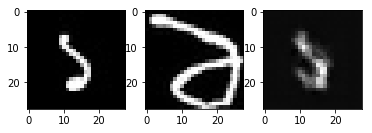

step 12: real_loss: [0.34307548, 0.59375]---fake_loss: [0.34797323, 0.5]---GAN_LOSS: 8.458337783813477
step 13: real_loss: [0.3325363, 0.65625]---fake_loss: [0.35956132, 0.5]---GAN_LOSS: 8.7485933303833
step 14: real_loss: [0.3407826, 0.625]---fake_loss: [0.3665029, 0.4375]---GAN_LOSS: 8.770072937011719
step 15: real_loss: [0.3374783, 0.53125]---fake_loss: [0.35686317, 0.53125]---GAN_LOSS: 8.644887924194336
step 16: real_loss: [0.34202355, 0.53125]---fake_loss: [0.36228943, 0.4375]---GAN_LOSS: 8.287321090698242
step 17: real_loss: [0.34087396, 0.5]---fake_loss: [0.3519143, 0.46875]---GAN_LOSS: 8.93394947052002
step 18: real_loss: [0.3416459, 0.65625]---fake_loss: [0.35741997, 0.4375]---GAN_LOSS: 8.363146781921387
step 19: real_loss: [0.34408373, 0.625]---fake_loss: [0.37095535, 0.53125]---GAN_LOSS: 8.665374755859375
step 20: real_loss: [0.34766245, 0.59375]---fake_loss: [0.36774874, 0.375]---GAN_LOSS: 8.804216384887695
step 21: real_loss: [0.3376428, 0.53125]---fake_loss: [0.34988734, 

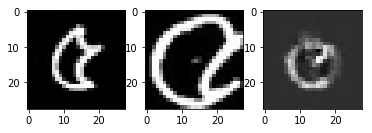

step 22: real_loss: [0.3385561, 0.5625]---fake_loss: [0.37306586, 0.4375]---GAN_LOSS: 8.832015037536621
step 23: real_loss: [0.34145692, 0.53125]---fake_loss: [0.3632173, 0.59375]---GAN_LOSS: 8.54761028289795
step 24: real_loss: [0.34457904, 0.5625]---fake_loss: [0.3678697, 0.4375]---GAN_LOSS: 8.542136192321777
step 25: real_loss: [0.33896312, 0.5625]---fake_loss: [0.36825436, 0.4375]---GAN_LOSS: 8.352646827697754
step 26: real_loss: [0.3361132, 0.6875]---fake_loss: [0.36090583, 0.34375]---GAN_LOSS: 8.289325714111328
step 27: real_loss: [0.34000444, 0.5625]---fake_loss: [0.35211322, 0.53125]---GAN_LOSS: 8.877284049987793
step 28: real_loss: [0.33391768, 0.625]---fake_loss: [0.3587929, 0.4375]---GAN_LOSS: 8.710465431213379
step 29: real_loss: [0.3365727, 0.65625]---fake_loss: [0.35748172, 0.5]---GAN_LOSS: 8.904837608337402
step 30: real_loss: [0.3355242, 0.59375]---fake_loss: [0.3613847, 0.40625]---GAN_LOSS: 8.656840324401855
step 31: real_loss: [0.34316427, 0.53125]---fake_loss: [0.360

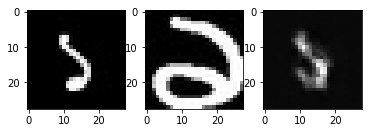

step 32: real_loss: [0.33679342, 0.59375]---fake_loss: [0.3610449, 0.4375]---GAN_LOSS: 8.637856483459473
step 33: real_loss: [0.34665734, 0.53125]---fake_loss: [0.3708536, 0.5]---GAN_LOSS: 8.865202903747559
step 34: real_loss: [0.34011865, 0.53125]---fake_loss: [0.37018317, 0.3125]---GAN_LOSS: 8.523483276367188
step 35: real_loss: [0.34264892, 0.59375]---fake_loss: [0.3675837, 0.375]---GAN_LOSS: 8.488502502441406
step 36: real_loss: [0.33916324, 0.59375]---fake_loss: [0.362252, 0.40625]---GAN_LOSS: 8.638206481933594
step 37: real_loss: [0.34792694, 0.59375]---fake_loss: [0.36380354, 0.4375]---GAN_LOSS: 8.302593231201172
step 38: real_loss: [0.34224778, 0.65625]---fake_loss: [0.36351925, 0.5]---GAN_LOSS: 8.45351791381836
step 39: real_loss: [0.33291435, 0.625]---fake_loss: [0.36434448, 0.34375]---GAN_LOSS: 9.049110412597656
step 40: real_loss: [0.3427789, 0.5625]---fake_loss: [0.3609837, 0.5]---GAN_LOSS: 8.379034042358398
step 41: real_loss: [0.33984262, 0.5625]---fake_loss: [0.369057, 

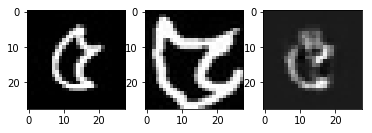

step 42: real_loss: [0.34239745, 0.59375]---fake_loss: [0.3612996, 0.5]---GAN_LOSS: 8.09311294555664
step 43: real_loss: [0.34891385, 0.40625]---fake_loss: [0.3735428, 0.25]---GAN_LOSS: 8.389802932739258
step 44: real_loss: [0.34404176, 0.59375]---fake_loss: [0.35221905, 0.5625]---GAN_LOSS: 8.849088668823242
step 45: real_loss: [0.34255984, 0.5625]---fake_loss: [0.3614521, 0.46875]---GAN_LOSS: 7.827547550201416
step 46: real_loss: [0.3426652, 0.5625]---fake_loss: [0.36328107, 0.5]---GAN_LOSS: 8.49555778503418
step 47: real_loss: [0.3375831, 0.59375]---fake_loss: [0.3610932, 0.46875]---GAN_LOSS: 8.326751708984375
step 48: real_loss: [0.34561324, 0.59375]---fake_loss: [0.36132452, 0.4375]---GAN_LOSS: 9.493521690368652
step 49: real_loss: [0.34195787, 0.59375]---fake_loss: [0.36828038, 0.4375]---GAN_LOSS: 8.0518159866333
step 50: real_loss: [0.33262104, 0.65625]---fake_loss: [0.36035937, 0.40625]---GAN_LOSS: 8.617116928100586
step 51: real_loss: [0.34408876, 0.40625]---fake_loss: [0.36979

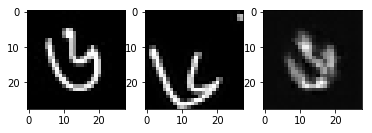

step 52: real_loss: [0.3363354, 0.5625]---fake_loss: [0.3617856, 0.5625]---GAN_LOSS: 8.87331485748291
step 53: real_loss: [0.34643355, 0.53125]---fake_loss: [0.35846514, 0.4375]---GAN_LOSS: 7.93463134765625
step 54: real_loss: [0.3421717, 0.5625]---fake_loss: [0.35742885, 0.46875]---GAN_LOSS: 7.942044258117676
step 55: real_loss: [0.34157193, 0.4375]---fake_loss: [0.35011327, 0.4375]---GAN_LOSS: 8.421391487121582
step 56: real_loss: [0.34099993, 0.625]---fake_loss: [0.3681733, 0.375]---GAN_LOSS: 8.060663223266602
step 57: real_loss: [0.33223826, 0.65625]---fake_loss: [0.37101936, 0.375]---GAN_LOSS: 8.012104034423828
step 58: real_loss: [0.35247222, 0.375]---fake_loss: [0.36942768, 0.46875]---GAN_LOSS: 8.267228126525879
step 59: real_loss: [0.34595555, 0.53125]---fake_loss: [0.35418808, 0.4375]---GAN_LOSS: 8.059152603149414
step 60: real_loss: [0.34947976, 0.5]---fake_loss: [0.36408585, 0.40625]---GAN_LOSS: 8.381620407104492
step 61: real_loss: [0.3413036, 0.59375]---fake_loss: [0.36711

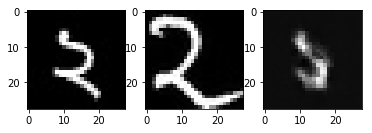

step 62: real_loss: [0.33810148, 0.71875]---fake_loss: [0.35511842, 0.5]---GAN_LOSS: 8.939805030822754
step 63: real_loss: [0.34991634, 0.53125]---fake_loss: [0.36470664, 0.46875]---GAN_LOSS: 7.903125762939453
step 64: real_loss: [0.34620953, 0.53125]---fake_loss: [0.36055058, 0.375]---GAN_LOSS: 8.15092658996582
step 65: real_loss: [0.33850184, 0.625]---fake_loss: [0.3544703, 0.4375]---GAN_LOSS: 8.31322193145752
step 66: real_loss: [0.34548837, 0.5625]---fake_loss: [0.36390704, 0.5]---GAN_LOSS: 8.647655487060547
step 67: real_loss: [0.3395927, 0.53125]---fake_loss: [0.34414738, 0.5625]---GAN_LOSS: 8.705574035644531
step 68: real_loss: [0.34251708, 0.5625]---fake_loss: [0.36669213, 0.34375]---GAN_LOSS: 8.386642456054688
step 69: real_loss: [0.35197157, 0.46875]---fake_loss: [0.36134425, 0.5]---GAN_LOSS: 8.476744651794434
step 70: real_loss: [0.3400234, 0.53125]---fake_loss: [0.35895258, 0.46875]---GAN_LOSS: 8.201001167297363
step 71: real_loss: [0.34489718, 0.53125]---fake_loss: [0.3552

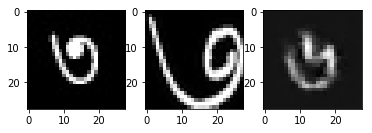

step 72: real_loss: [0.35060334, 0.5625]---fake_loss: [0.3519163, 0.5625]---GAN_LOSS: 7.833148956298828
step 73: real_loss: [0.33616507, 0.59375]---fake_loss: [0.36270607, 0.53125]---GAN_LOSS: 8.103286743164062
step 74: real_loss: [0.33855307, 0.53125]---fake_loss: [0.3574923, 0.46875]---GAN_LOSS: 7.919975280761719
step 75: real_loss: [0.3357861, 0.625]---fake_loss: [0.3567466, 0.46875]---GAN_LOSS: 7.913734436035156
step 76: real_loss: [0.32906055, 0.65625]---fake_loss: [0.36213964, 0.5625]---GAN_LOSS: 8.949878692626953
step 77: real_loss: [0.33686092, 0.59375]---fake_loss: [0.36588055, 0.34375]---GAN_LOSS: 8.15560531616211
step 78: real_loss: [0.33715767, 0.53125]---fake_loss: [0.36330467, 0.4375]---GAN_LOSS: 8.884079933166504
step 79: real_loss: [0.33296618, 0.59375]---fake_loss: [0.3458528, 0.53125]---GAN_LOSS: 7.970926284790039
step 80: real_loss: [0.34643966, 0.625]---fake_loss: [0.3592416, 0.4375]---GAN_LOSS: 8.467192649841309
step 81: real_loss: [0.34496045, 0.46875]---fake_loss

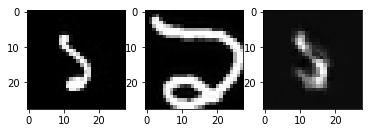

step 82: real_loss: [0.3438904, 0.53125]---fake_loss: [0.36362118, 0.4375]---GAN_LOSS: 7.936010360717773
step 83: real_loss: [0.34404552, 0.53125]---fake_loss: [0.35371512, 0.375]---GAN_LOSS: 8.13477611541748
step 84: real_loss: [0.3444501, 0.5625]---fake_loss: [0.36343712, 0.34375]---GAN_LOSS: 8.001815795898438
step 85: real_loss: [0.34245753, 0.625]---fake_loss: [0.35247076, 0.4375]---GAN_LOSS: 8.357705116271973
step 86: real_loss: [0.3473339, 0.5625]---fake_loss: [0.363267, 0.28125]---GAN_LOSS: 8.297839164733887
step 87: real_loss: [0.3384466, 0.59375]---fake_loss: [0.36076996, 0.46875]---GAN_LOSS: 7.836407661437988
step 88: real_loss: [0.34522617, 0.625]---fake_loss: [0.35474694, 0.5]---GAN_LOSS: 7.970417022705078
step 89: real_loss: [0.33980888, 0.65625]---fake_loss: [0.35492375, 0.40625]---GAN_LOSS: 7.913393020629883
step 90: real_loss: [0.3455156, 0.40625]---fake_loss: [0.36497268, 0.4375]---GAN_LOSS: 7.744913578033447
step 91: real_loss: [0.34017587, 0.5625]---fake_loss: [0.355

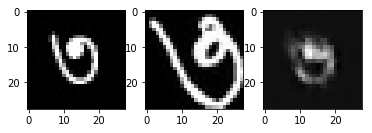

step 92: real_loss: [0.34254053, 0.53125]---fake_loss: [0.36212984, 0.5]---GAN_LOSS: 7.907815933227539
step 93: real_loss: [0.34492192, 0.5625]---fake_loss: [0.3553, 0.53125]---GAN_LOSS: 7.574639320373535


In [20]:
for i in range(I):
    #generating real sample
    [real_hand,real_print],real_label = generat_real_samples()
    #generating fake sample
    fake_print,fake_label = generate_fake_samples(generator,real_hand)
    #update discriminator for real sample
    d_loss1 = discriminator.train_on_batch([real_hand,real_print,], real_label)
    #update discriminator for fake sample
    d_loss2 = discriminator.train_on_batch([fake_print,real_print,], fake_label)
    # update the generator
    g_loss, _, _ = gan_model.train_on_batch(real_hand, [real_label, real_print])
    #print performance
    print("step {}: real_loss: {}---fake_loss: {}---GAN_LOSS: {}".format(i+1, d_loss1,d_loss2,g_loss))
    if i % 10 == 0:
        #filename = '/GAN/model_%06d' % (i+1)
        #g_model.save(filename+'gan.h5')
        #generator.save(filename+'generator.h5')
        #discriminator.save(filename+'discriminator.h5')
        a = 5
        i = real_print[a]
        j = np.reshape(i,(28,28))
        plt.subplot(1,3,1)
        plt.imshow(j,cmap='gray')
        i = real_hand[a]
        j = np.reshape(i,(28,28))
        plt.subplot(1,3,2)
        plt.imshow(j,cmap='gray')
        i = fake_print[a]
        j = np.reshape(i,(28,28))
        plt.subplot(1,3,3)
        plt.imshow(j,cmap='gray')
        plt.show()
        

Found 2980 images belonging to 10 classes.
step 1: real_loss: [0.012983974, 1.0]---fake_loss: [0.027566653, 1.0]---GAN_LOSS: 1.054247260093689


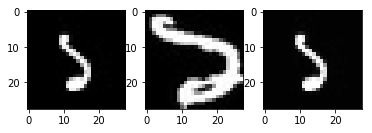

step 2: real_loss: [0.026073916, 1.0]---fake_loss: [0.00872688, 1.0]---GAN_LOSS: 1.0249618291854858
step 3: real_loss: [0.009955753, 1.0]---fake_loss: [0.017995993, 1.0]---GAN_LOSS: 0.8667151927947998
step 4: real_loss: [0.0155143645, 1.0]---fake_loss: [0.012346789, 1.0]---GAN_LOSS: 0.8986302614212036
step 5: real_loss: [0.012571393, 1.0]---fake_loss: [0.013072083, 1.0]---GAN_LOSS: 0.927972137928009
step 6: real_loss: [0.06495728, 0.96875]---fake_loss: [0.01178281, 1.0]---GAN_LOSS: 0.9371761083602905
step 7: real_loss: [0.010890356, 1.0]---fake_loss: [0.016205773, 1.0]---GAN_LOSS: 0.9724886417388916
step 8: real_loss: [0.012208773, 1.0]---fake_loss: [0.00637444, 1.0]---GAN_LOSS: 0.9499615430831909
step 9: real_loss: [0.008957418, 1.0]---fake_loss: [0.007331945, 1.0]---GAN_LOSS: 0.8909368515014648
step 10: real_loss: [0.0066087167, 1.0]---fake_loss: [0.00551988, 1.0]---GAN_LOSS: 0.9393109679222107
step 11: real_loss: [0.032873202, 1.0]---fake_loss: [0.012135889, 1.0]---GAN_LOSS: 0.95666

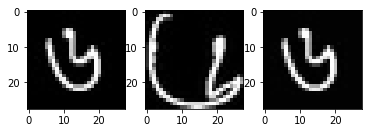

step 12: real_loss: [0.01452833, 1.0]---fake_loss: [0.035594217, 1.0]---GAN_LOSS: 0.9502418637275696
step 13: real_loss: [0.01363977, 1.0]---fake_loss: [0.012843786, 1.0]---GAN_LOSS: 0.9352726936340332
step 14: real_loss: [0.034336623, 1.0]---fake_loss: [0.0061035994, 1.0]---GAN_LOSS: 0.8740069270133972
step 15: real_loss: [0.00825433, 1.0]---fake_loss: [0.028909624, 0.96875]---GAN_LOSS: 0.9134511351585388
step 16: real_loss: [0.0130801955, 1.0]---fake_loss: [0.0058049774, 1.0]---GAN_LOSS: 0.9424939155578613
step 17: real_loss: [0.017923702, 1.0]---fake_loss: [0.011264635, 1.0]---GAN_LOSS: 0.906234085559845
step 18: real_loss: [0.0104438625, 1.0]---fake_loss: [0.0073630097, 1.0]---GAN_LOSS: 0.9336103200912476
step 19: real_loss: [0.011471445, 1.0]---fake_loss: [0.010641807, 1.0]---GAN_LOSS: 0.9118172526359558
step 20: real_loss: [0.010323772, 1.0]---fake_loss: [0.020963758, 1.0]---GAN_LOSS: 0.957862138748169
step 21: real_loss: [0.021902142, 1.0]---fake_loss: [0.039865393, 1.0]---GAN_L

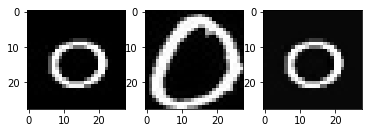

step 22: real_loss: [0.015055613, 1.0]---fake_loss: [0.011111591, 1.0]---GAN_LOSS: 0.8630927205085754
step 23: real_loss: [0.0103347115, 1.0]---fake_loss: [0.008037473, 1.0]---GAN_LOSS: 0.9614596366882324
step 24: real_loss: [0.009788804, 1.0]---fake_loss: [0.007841315, 1.0]---GAN_LOSS: 0.9499257206916809
step 25: real_loss: [0.013079731, 1.0]---fake_loss: [0.013610783, 1.0]---GAN_LOSS: 1.0957623720169067
step 26: real_loss: [0.02432939, 1.0]---fake_loss: [0.009873871, 1.0]---GAN_LOSS: 0.9169788956642151
step 27: real_loss: [0.012285341, 1.0]---fake_loss: [0.0110501535, 1.0]---GAN_LOSS: 0.9357115626335144
step 28: real_loss: [0.012296888, 1.0]---fake_loss: [0.009237854, 1.0]---GAN_LOSS: 0.9580146670341492
step 29: real_loss: [0.024104886, 1.0]---fake_loss: [0.01033279, 1.0]---GAN_LOSS: 0.9604769349098206
step 30: real_loss: [0.008928582, 1.0]---fake_loss: [0.011443255, 1.0]---GAN_LOSS: 0.9642149209976196
step 31: real_loss: [0.039390396, 0.96875]---fake_loss: [0.012889741, 1.0]---GAN_L

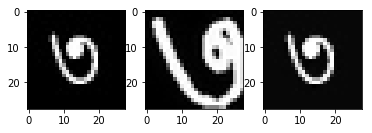

step 32: real_loss: [0.019168489, 1.0]---fake_loss: [0.0058344677, 1.0]---GAN_LOSS: 0.9812020063400269
step 33: real_loss: [0.0132966805, 1.0]---fake_loss: [0.007150608, 1.0]---GAN_LOSS: 0.9076884388923645
step 34: real_loss: [0.015970942, 1.0]---fake_loss: [0.017308757, 1.0]---GAN_LOSS: 0.922029972076416
step 35: real_loss: [0.010259433, 1.0]---fake_loss: [0.017757686, 1.0]---GAN_LOSS: 1.0111356973648071
step 36: real_loss: [0.010400858, 1.0]---fake_loss: [0.005380723, 1.0]---GAN_LOSS: 0.9102115035057068
step 37: real_loss: [0.017780092, 1.0]---fake_loss: [0.007500784, 1.0]---GAN_LOSS: 1.0549333095550537
step 38: real_loss: [0.019788321, 1.0]---fake_loss: [0.008094041, 1.0]---GAN_LOSS: 0.9398800730705261
step 39: real_loss: [0.0062090526, 1.0]---fake_loss: [0.0092878835, 1.0]---GAN_LOSS: 1.006752610206604
step 40: real_loss: [0.013722183, 1.0]---fake_loss: [0.018999794, 1.0]---GAN_LOSS: 1.0333932638168335
step 41: real_loss: [0.012390399, 1.0]---fake_loss: [0.006064497, 1.0]---GAN_LOS

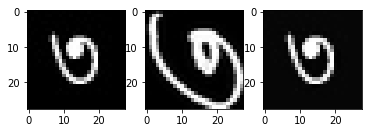

step 42: real_loss: [0.011682982, 1.0]---fake_loss: [0.018730672, 1.0]---GAN_LOSS: 0.9532363414764404
step 43: real_loss: [0.008329167, 1.0]---fake_loss: [0.017193262, 1.0]---GAN_LOSS: 1.007838249206543
step 44: real_loss: [0.00779814, 1.0]---fake_loss: [0.0061403, 1.0]---GAN_LOSS: 0.8681570291519165
step 45: real_loss: [0.0133814905, 1.0]---fake_loss: [0.009615747, 1.0]---GAN_LOSS: 0.9396054148674011
step 46: real_loss: [0.0052020634, 1.0]---fake_loss: [0.012076948, 1.0]---GAN_LOSS: 0.9891682267189026
step 47: real_loss: [0.01883505, 1.0]---fake_loss: [0.0066532977, 1.0]---GAN_LOSS: 0.9046030044555664
step 48: real_loss: [0.036528356, 0.96875]---fake_loss: [0.0065317145, 1.0]---GAN_LOSS: 0.8593240976333618
step 49: real_loss: [0.007967067, 1.0]---fake_loss: [0.009006889, 1.0]---GAN_LOSS: 0.8731935024261475
step 50: real_loss: [0.009470895, 1.0]---fake_loss: [0.041831624, 1.0]---GAN_LOSS: 0.913340151309967
step 51: real_loss: [0.008935095, 1.0]---fake_loss: [0.0474217, 0.96875]---GAN_L

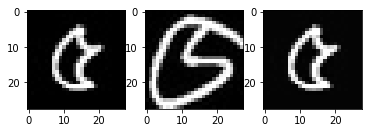

step 52: real_loss: [0.014851276, 1.0]---fake_loss: [0.007946292, 1.0]---GAN_LOSS: 0.9919590353965759
step 53: real_loss: [0.009282514, 1.0]---fake_loss: [0.018183101, 1.0]---GAN_LOSS: 0.9560840725898743
step 54: real_loss: [0.019823775, 1.0]---fake_loss: [0.008536948, 1.0]---GAN_LOSS: 0.9063395857810974
step 55: real_loss: [0.0063039795, 1.0]---fake_loss: [0.0077897287, 1.0]---GAN_LOSS: 0.9062777161598206
step 56: real_loss: [0.011347268, 1.0]---fake_loss: [0.0061181206, 1.0]---GAN_LOSS: 0.9095463752746582
step 57: real_loss: [0.010728279, 1.0]---fake_loss: [0.007120453, 1.0]---GAN_LOSS: 0.9104769229888916
step 58: real_loss: [0.009015495, 1.0]---fake_loss: [0.010834883, 1.0]---GAN_LOSS: 1.0003690719604492
step 59: real_loss: [0.013780098, 1.0]---fake_loss: [0.010076078, 1.0]---GAN_LOSS: 1.1235631704330444
step 60: real_loss: [0.010634648, 1.0]---fake_loss: [0.00704923, 1.0]---GAN_LOSS: 0.8871046304702759
step 61: real_loss: [0.016358424, 1.0]---fake_loss: [0.0113012185, 1.0]---GAN_LO

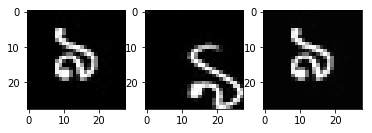

step 62: real_loss: [0.015856467, 1.0]---fake_loss: [0.08632398, 0.96875]---GAN_LOSS: 0.8851794600486755
step 63: real_loss: [0.009949232, 1.0]---fake_loss: [0.011372876, 1.0]---GAN_LOSS: 1.0167317390441895
step 64: real_loss: [0.010466824, 1.0]---fake_loss: [0.014324594, 1.0]---GAN_LOSS: 1.0515718460083008
step 65: real_loss: [0.012917711, 1.0]---fake_loss: [0.006406854, 1.0]---GAN_LOSS: 1.0542309284210205
step 66: real_loss: [0.011170151, 1.0]---fake_loss: [0.0075282855, 1.0]---GAN_LOSS: 0.9172157049179077
step 67: real_loss: [0.014715679, 1.0]---fake_loss: [0.03229321, 1.0]---GAN_LOSS: 0.8992983102798462
step 68: real_loss: [0.014712403, 1.0]---fake_loss: [0.010648858, 1.0]---GAN_LOSS: 0.8938829302787781
step 69: real_loss: [0.010425759, 1.0]---fake_loss: [0.0061190436, 1.0]---GAN_LOSS: 0.9271558523178101
step 70: real_loss: [0.00982727, 1.0]---fake_loss: [0.04567989, 1.0]---GAN_LOSS: 1.0680663585662842
step 71: real_loss: [0.011575457, 1.0]---fake_loss: [0.018525397, 1.0]---GAN_LOS

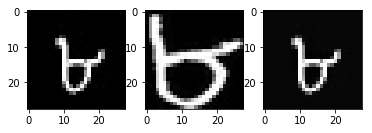

step 72: real_loss: [0.008923446, 1.0]---fake_loss: [0.0072049666, 1.0]---GAN_LOSS: 0.9539653658866882
step 73: real_loss: [0.00933956, 1.0]---fake_loss: [0.0067107324, 1.0]---GAN_LOSS: 0.9031275510787964
step 74: real_loss: [0.007694103, 1.0]---fake_loss: [0.01032788, 1.0]---GAN_LOSS: 0.9226412773132324
step 75: real_loss: [0.041929334, 0.96875]---fake_loss: [0.007285333, 1.0]---GAN_LOSS: 1.1255378723144531
step 76: real_loss: [0.012683265, 1.0]---fake_loss: [0.010166988, 1.0]---GAN_LOSS: 0.9463769197463989
step 77: real_loss: [0.008890029, 1.0]---fake_loss: [0.009464169, 1.0]---GAN_LOSS: 1.0739350318908691
step 78: real_loss: [0.008411567, 1.0]---fake_loss: [0.012832688, 1.0]---GAN_LOSS: 0.8549224138259888
step 79: real_loss: [0.005746275, 1.0]---fake_loss: [0.03416272, 1.0]---GAN_LOSS: 0.9552885890007019
step 80: real_loss: [0.009744753, 1.0]---fake_loss: [0.014670165, 1.0]---GAN_LOSS: 0.9265249967575073
step 81: real_loss: [0.014376173, 1.0]---fake_loss: [0.011333676, 1.0]---GAN_LO

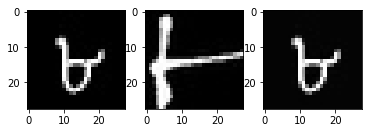

step 82: real_loss: [0.00934477, 1.0]---fake_loss: [0.011471262, 1.0]---GAN_LOSS: 0.9080785512924194
step 83: real_loss: [0.006157184, 1.0]---fake_loss: [0.023611795, 1.0]---GAN_LOSS: 0.9436719417572021
step 84: real_loss: [0.014667427, 1.0]---fake_loss: [0.0086738635, 1.0]---GAN_LOSS: 0.9144688844680786
step 85: real_loss: [0.009512339, 1.0]---fake_loss: [0.010833457, 1.0]---GAN_LOSS: 0.8972360491752625
step 86: real_loss: [0.030847792, 1.0]---fake_loss: [0.0063802726, 1.0]---GAN_LOSS: 0.920209527015686
step 87: real_loss: [0.013434014, 1.0]---fake_loss: [0.007827083, 1.0]---GAN_LOSS: 0.9370302557945251
step 88: real_loss: [0.02149348, 1.0]---fake_loss: [0.0138107445, 1.0]---GAN_LOSS: 1.0109211206436157
step 89: real_loss: [0.010988035, 1.0]---fake_loss: [0.0058710184, 1.0]---GAN_LOSS: 0.9304341673851013
step 90: real_loss: [0.008905061, 1.0]---fake_loss: [0.005277013, 1.0]---GAN_LOSS: 0.8916283845901489
step 91: real_loss: [0.01927707, 1.0]---fake_loss: [0.008287234, 1.0]---GAN_LOSS:

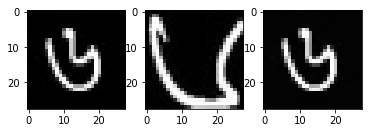

step 92: real_loss: [0.009135768, 1.0]---fake_loss: [0.0062876306, 1.0]---GAN_LOSS: 0.8988144993782043
step 93: real_loss: [0.010933701, 1.0]---fake_loss: [0.010914484, 1.0]---GAN_LOSS: 0.956207811832428
Found 2980 images belonging to 10 classes.
step 1: real_loss: [0.011350024, 1.0]---fake_loss: [0.022748323, 0.96875]---GAN_LOSS: 0.9145029187202454


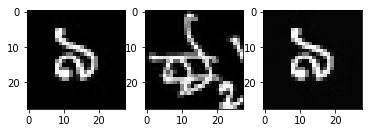

step 2: real_loss: [0.014226658, 1.0]---fake_loss: [0.011448778, 1.0]---GAN_LOSS: 0.9168625473976135
step 3: real_loss: [0.00807764, 1.0]---fake_loss: [0.010613821, 1.0]---GAN_LOSS: 0.9093322157859802
step 4: real_loss: [0.013630527, 1.0]---fake_loss: [0.0105257835, 1.0]---GAN_LOSS: 0.951337993144989
step 5: real_loss: [0.009337393, 1.0]---fake_loss: [0.0054836357, 1.0]---GAN_LOSS: 1.0532522201538086
step 6: real_loss: [0.009887271, 1.0]---fake_loss: [0.02493742, 0.96875]---GAN_LOSS: 0.9455512166023254
step 7: real_loss: [0.016206877, 1.0]---fake_loss: [0.028472167, 1.0]---GAN_LOSS: 0.9941976070404053
step 8: real_loss: [0.011780594, 1.0]---fake_loss: [0.018669493, 1.0]---GAN_LOSS: 0.9036630988121033
step 9: real_loss: [0.01579456, 1.0]---fake_loss: [0.0055724736, 1.0]---GAN_LOSS: 1.0088551044464111
step 10: real_loss: [0.016799506, 1.0]---fake_loss: [0.008463275, 1.0]---GAN_LOSS: 1.0611557960510254
step 11: real_loss: [0.015056669, 1.0]---fake_loss: [0.013718361, 1.0]---GAN_LOSS: 0.97

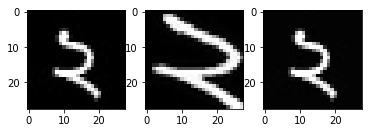

step 12: real_loss: [0.011402473, 1.0]---fake_loss: [0.014886867, 1.0]---GAN_LOSS: 0.9301663637161255
step 13: real_loss: [0.00924043, 1.0]---fake_loss: [0.025729364, 1.0]---GAN_LOSS: 0.9484450221061707
step 14: real_loss: [0.008417685, 1.0]---fake_loss: [0.096527204, 1.0]---GAN_LOSS: 0.9846640825271606
step 15: real_loss: [0.01150544, 1.0]---fake_loss: [0.021881286, 1.0]---GAN_LOSS: 0.8940326571464539
step 16: real_loss: [0.015714996, 1.0]---fake_loss: [0.041953024, 1.0]---GAN_LOSS: 0.9113394021987915
step 17: real_loss: [0.010632153, 1.0]---fake_loss: [0.008787768, 1.0]---GAN_LOSS: 0.8862314224243164
step 18: real_loss: [0.012243466, 1.0]---fake_loss: [0.021322016, 1.0]---GAN_LOSS: 0.9728712439537048
step 19: real_loss: [0.009300958, 1.0]---fake_loss: [0.014565337, 1.0]---GAN_LOSS: 0.9578109383583069
step 20: real_loss: [0.00697364, 1.0]---fake_loss: [0.009993541, 1.0]---GAN_LOSS: 0.864202082157135
step 21: real_loss: [0.0144935055, 1.0]---fake_loss: [0.008928473, 1.0]---GAN_LOSS: 0.

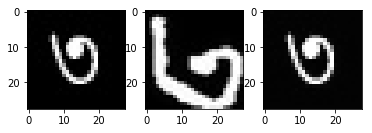

step 22: real_loss: [0.011012246, 1.0]---fake_loss: [0.009439047, 1.0]---GAN_LOSS: 0.859440803527832
step 23: real_loss: [0.0060184533, 1.0]---fake_loss: [0.011869319, 1.0]---GAN_LOSS: 1.0306733846664429
step 24: real_loss: [0.008699868, 1.0]---fake_loss: [0.008021085, 1.0]---GAN_LOSS: 0.9013933539390564
step 25: real_loss: [0.012310782, 1.0]---fake_loss: [0.008407891, 1.0]---GAN_LOSS: 0.9268467426300049
step 26: real_loss: [0.026969803, 1.0]---fake_loss: [0.009085385, 1.0]---GAN_LOSS: 0.9244781136512756
step 27: real_loss: [0.010588575, 1.0]---fake_loss: [0.02019633, 1.0]---GAN_LOSS: 1.024613380432129
step 28: real_loss: [0.01224604, 1.0]---fake_loss: [0.009187721, 1.0]---GAN_LOSS: 0.9394271373748779
step 29: real_loss: [0.021474801, 1.0]---fake_loss: [0.03569501, 0.96875]---GAN_LOSS: 0.9340178966522217
step 30: real_loss: [0.01145296, 1.0]---fake_loss: [0.0061826147, 1.0]---GAN_LOSS: 0.9203801155090332
step 31: real_loss: [0.01789911, 1.0]---fake_loss: [0.008345721, 1.0]---GAN_LOSS: 

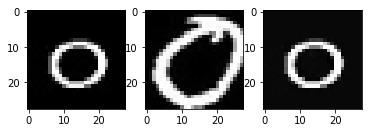

step 32: real_loss: [0.011930795, 1.0]---fake_loss: [0.007639107, 1.0]---GAN_LOSS: 1.000444769859314
step 33: real_loss: [0.011790099, 1.0]---fake_loss: [0.007978993, 1.0]---GAN_LOSS: 0.9948037266731262
step 34: real_loss: [0.0103512565, 1.0]---fake_loss: [0.009040309, 1.0]---GAN_LOSS: 0.9259411692619324
step 35: real_loss: [0.010119801, 1.0]---fake_loss: [0.009745941, 1.0]---GAN_LOSS: 0.9246259927749634
step 36: real_loss: [0.0075913784, 1.0]---fake_loss: [0.0074509876, 1.0]---GAN_LOSS: 1.1253153085708618
step 37: real_loss: [0.027099978, 1.0]---fake_loss: [0.011892112, 1.0]---GAN_LOSS: 1.0766911506652832
step 38: real_loss: [0.019114692, 0.96875]---fake_loss: [0.014208637, 1.0]---GAN_LOSS: 0.9268664717674255
step 39: real_loss: [0.01147281, 1.0]---fake_loss: [0.009495109, 1.0]---GAN_LOSS: 0.9282829761505127
step 40: real_loss: [0.0076277643, 1.0]---fake_loss: [0.04831167, 0.96875]---GAN_LOSS: 0.9370413422584534
step 41: real_loss: [0.010155225, 1.0]---fake_loss: [0.0052572014, 1.0]--

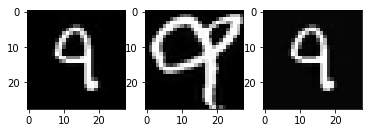

step 42: real_loss: [0.017758641, 1.0]---fake_loss: [0.008906743, 1.0]---GAN_LOSS: 0.9145569801330566
step 43: real_loss: [0.011171308, 1.0]---fake_loss: [0.014746741, 1.0]---GAN_LOSS: 0.9672067761421204
step 44: real_loss: [0.012301657, 1.0]---fake_loss: [0.006622093, 1.0]---GAN_LOSS: 0.9568637609481812
step 45: real_loss: [0.008898808, 1.0]---fake_loss: [0.00805123, 1.0]---GAN_LOSS: 0.9263997077941895
step 46: real_loss: [0.017451137, 1.0]---fake_loss: [0.007293065, 1.0]---GAN_LOSS: 0.9673893451690674
step 47: real_loss: [0.007963665, 1.0]---fake_loss: [0.0075322846, 1.0]---GAN_LOSS: 0.9525948166847229
step 48: real_loss: [0.01101395, 1.0]---fake_loss: [0.0067173922, 1.0]---GAN_LOSS: 1.0106959342956543
step 49: real_loss: [0.008211861, 1.0]---fake_loss: [0.015698276, 1.0]---GAN_LOSS: 0.9045196771621704
step 50: real_loss: [0.012770646, 1.0]---fake_loss: [0.017750295, 1.0]---GAN_LOSS: 0.879718542098999
step 51: real_loss: [0.011890965, 1.0]---fake_loss: [0.007045801, 1.0]---GAN_LOSS: 

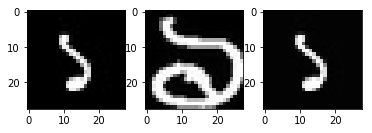

step 52: real_loss: [0.008187979, 1.0]---fake_loss: [0.047910005, 1.0]---GAN_LOSS: 0.9764931201934814
step 53: real_loss: [0.007974379, 1.0]---fake_loss: [0.009474935, 1.0]---GAN_LOSS: 0.8910032510757446
step 54: real_loss: [0.0060561188, 1.0]---fake_loss: [0.0073318826, 1.0]---GAN_LOSS: 1.0853098630905151
step 55: real_loss: [0.016481424, 1.0]---fake_loss: [0.01683928, 1.0]---GAN_LOSS: 1.0031728744506836
step 56: real_loss: [0.02218664, 1.0]---fake_loss: [0.0070115523, 1.0]---GAN_LOSS: 1.1240769624710083
step 57: real_loss: [0.007797303, 1.0]---fake_loss: [0.011683584, 1.0]---GAN_LOSS: 0.9253816604614258
step 58: real_loss: [0.012002684, 1.0]---fake_loss: [0.01069746, 1.0]---GAN_LOSS: 0.9568015336990356
step 59: real_loss: [0.007194454, 1.0]---fake_loss: [0.012151068, 1.0]---GAN_LOSS: 0.9069804549217224
step 60: real_loss: [0.010552736, 1.0]---fake_loss: [0.010338886, 1.0]---GAN_LOSS: 1.6389652490615845
step 61: real_loss: [0.008007087, 1.0]---fake_loss: [0.006124816, 1.0]---GAN_LOSS:

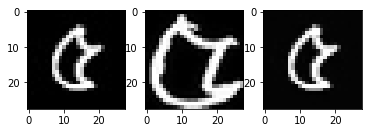

step 62: real_loss: [0.013847917, 1.0]---fake_loss: [0.08916722, 0.96875]---GAN_LOSS: 0.939311146736145
step 63: real_loss: [0.048491288, 1.0]---fake_loss: [0.0076319072, 1.0]---GAN_LOSS: 0.9548827409744263
step 64: real_loss: [0.009489502, 1.0]---fake_loss: [0.0114488285, 1.0]---GAN_LOSS: 1.05275297164917
step 65: real_loss: [0.018690392, 1.0]---fake_loss: [0.008437676, 1.0]---GAN_LOSS: 1.0981945991516113
step 66: real_loss: [0.010837404, 1.0]---fake_loss: [0.009732858, 1.0]---GAN_LOSS: 1.1143068075180054
step 67: real_loss: [0.011792384, 1.0]---fake_loss: [0.008980483, 1.0]---GAN_LOSS: 0.9592460989952087
step 68: real_loss: [0.011975815, 1.0]---fake_loss: [0.008323134, 1.0]---GAN_LOSS: 0.9721957445144653
step 69: real_loss: [0.014639005, 1.0]---fake_loss: [0.0069218567, 1.0]---GAN_LOSS: 0.926339328289032
step 70: real_loss: [0.0112512, 1.0]---fake_loss: [0.033342496, 0.96875]---GAN_LOSS: 0.9709388613700867
step 71: real_loss: [0.008277167, 1.0]---fake_loss: [0.03788393, 1.0]---GAN_LO

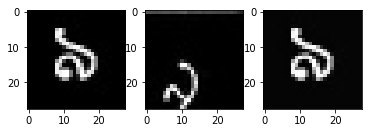

step 72: real_loss: [0.02379509, 1.0]---fake_loss: [0.006983384, 1.0]---GAN_LOSS: 0.9720901846885681
step 73: real_loss: [0.01374745, 1.0]---fake_loss: [0.011512546, 1.0]---GAN_LOSS: 0.9344186186790466
step 74: real_loss: [0.019787755, 1.0]---fake_loss: [0.008879614, 1.0]---GAN_LOSS: 0.9332279562950134
step 75: real_loss: [0.014440315, 1.0]---fake_loss: [0.008797729, 1.0]---GAN_LOSS: 0.8951772451400757
step 76: real_loss: [0.013566334, 1.0]---fake_loss: [0.007140509, 1.0]---GAN_LOSS: 0.9545614719390869
step 77: real_loss: [0.008071867, 1.0]---fake_loss: [0.007229485, 1.0]---GAN_LOSS: 0.9180483222007751
step 78: real_loss: [0.018591268, 1.0]---fake_loss: [0.006293855, 1.0]---GAN_LOSS: 0.9641159772872925
step 79: real_loss: [0.014214022, 1.0]---fake_loss: [0.007022825, 1.0]---GAN_LOSS: 0.889508843421936
step 80: real_loss: [0.010217076, 1.0]---fake_loss: [0.016963124, 1.0]---GAN_LOSS: 1.065543293952942
step 81: real_loss: [0.044543527, 0.96875]---fake_loss: [0.0073480927, 1.0]---GAN_LOSS

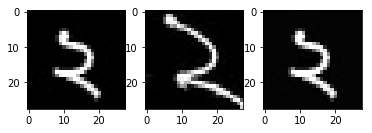

step 82: real_loss: [0.010240952, 1.0]---fake_loss: [0.010350546, 1.0]---GAN_LOSS: 0.9521145224571228
step 83: real_loss: [0.027766198, 0.96875]---fake_loss: [0.0050370125, 1.0]---GAN_LOSS: 0.872492253780365
step 84: real_loss: [0.00716829, 1.0]---fake_loss: [0.008524861, 1.0]---GAN_LOSS: 0.8939811587333679
step 85: real_loss: [0.011953134, 1.0]---fake_loss: [0.0058026216, 1.0]---GAN_LOSS: 0.9611181020736694
step 86: real_loss: [0.016875744, 1.0]---fake_loss: [0.006329109, 1.0]---GAN_LOSS: 0.9002074599266052
step 87: real_loss: [0.020278417, 1.0]---fake_loss: [0.012016874, 1.0]---GAN_LOSS: 0.9550501108169556
step 88: real_loss: [0.007719312, 1.0]---fake_loss: [0.006089784, 1.0]---GAN_LOSS: 0.9771403670310974
step 89: real_loss: [0.01627481, 1.0]---fake_loss: [0.025375087, 1.0]---GAN_LOSS: 0.8506345152854919
step 90: real_loss: [0.009544747, 1.0]---fake_loss: [0.0071001854, 1.0]---GAN_LOSS: 1.0537961721420288
step 91: real_loss: [0.009061306, 1.0]---fake_loss: [0.0082294885, 1.0]---GAN_

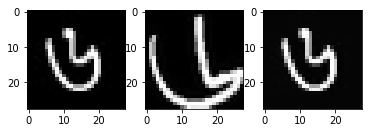

step 92: real_loss: [0.0093129715, 1.0]---fake_loss: [0.010217844, 1.0]---GAN_LOSS: 0.9109361171722412
step 93: real_loss: [0.02385958, 1.0]---fake_loss: [0.011556642, 1.0]---GAN_LOSS: 1.0794358253479004
Found 2980 images belonging to 10 classes.
step 1: real_loss: [0.009696044, 1.0]---fake_loss: [0.009235201, 1.0]---GAN_LOSS: 0.8974179625511169


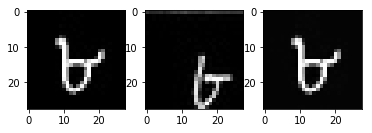

step 2: real_loss: [0.015935775, 1.0]---fake_loss: [0.02004955, 1.0]---GAN_LOSS: 1.2221759557724
step 3: real_loss: [0.0135540925, 1.0]---fake_loss: [0.011606989, 1.0]---GAN_LOSS: 0.9870849251747131
step 4: real_loss: [0.011783122, 1.0]---fake_loss: [0.0075093242, 1.0]---GAN_LOSS: 0.9547966122627258
step 5: real_loss: [0.029082386, 1.0]---fake_loss: [0.012220696, 1.0]---GAN_LOSS: 1.0816609859466553
step 6: real_loss: [0.016052248, 1.0]---fake_loss: [0.012143159, 1.0]---GAN_LOSS: 1.0289987325668335
step 7: real_loss: [0.010431412, 1.0]---fake_loss: [0.0066677374, 1.0]---GAN_LOSS: 1.0132312774658203
step 8: real_loss: [0.014759554, 1.0]---fake_loss: [0.0067299996, 1.0]---GAN_LOSS: 0.9522883296012878
step 9: real_loss: [0.010922786, 1.0]---fake_loss: [0.010532352, 1.0]---GAN_LOSS: 1.0283490419387817
step 10: real_loss: [0.016595274, 1.0]---fake_loss: [0.012388019, 1.0]---GAN_LOSS: 0.9800494909286499
step 11: real_loss: [0.019962186, 1.0]---fake_loss: [0.009189728, 1.0]---GAN_LOSS: 1.04813

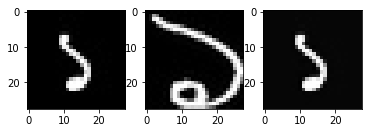

step 12: real_loss: [0.009215405, 1.0]---fake_loss: [0.0117855435, 1.0]---GAN_LOSS: 0.9609145522117615
step 13: real_loss: [0.012705479, 1.0]---fake_loss: [0.0098703755, 1.0]---GAN_LOSS: 0.946395754814148
step 14: real_loss: [0.009712548, 1.0]---fake_loss: [0.009092563, 1.0]---GAN_LOSS: 1.0471705198287964
step 15: real_loss: [0.008591343, 1.0]---fake_loss: [0.010553088, 1.0]---GAN_LOSS: 0.9821245074272156
step 16: real_loss: [0.021222223, 1.0]---fake_loss: [0.009550316, 1.0]---GAN_LOSS: 0.9917832016944885
step 17: real_loss: [0.012933949, 1.0]---fake_loss: [0.011005539, 1.0]---GAN_LOSS: 0.9020347595214844
step 18: real_loss: [0.013167284, 1.0]---fake_loss: [0.01099251, 1.0]---GAN_LOSS: 0.9185245037078857
step 19: real_loss: [0.0067982697, 1.0]---fake_loss: [0.010151869, 1.0]---GAN_LOSS: 0.9155187010765076
step 20: real_loss: [0.005922159, 1.0]---fake_loss: [0.014605919, 1.0]---GAN_LOSS: 1.1758815050125122
step 21: real_loss: [0.010240477, 1.0]---fake_loss: [0.021858256, 0.96875]---GAN_

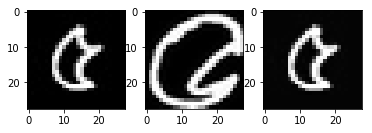

step 22: real_loss: [0.006657673, 1.0]---fake_loss: [0.013618962, 1.0]---GAN_LOSS: 0.9438212513923645
step 23: real_loss: [0.013517747, 1.0]---fake_loss: [0.0053662793, 1.0]---GAN_LOSS: 0.8958178162574768
step 24: real_loss: [0.009013999, 1.0]---fake_loss: [0.01161358, 1.0]---GAN_LOSS: 0.9482202529907227
step 25: real_loss: [0.02968067, 1.0]---fake_loss: [0.005491175, 1.0]---GAN_LOSS: 0.9443257451057434
step 26: real_loss: [0.006352636, 1.0]---fake_loss: [0.012936554, 1.0]---GAN_LOSS: 0.9542797803878784
step 27: real_loss: [0.010955971, 1.0]---fake_loss: [0.009017947, 1.0]---GAN_LOSS: 0.9065390229225159
step 28: real_loss: [0.0082284985, 1.0]---fake_loss: [0.008239088, 1.0]---GAN_LOSS: 0.9488943815231323
step 29: real_loss: [0.008145534, 1.0]---fake_loss: [0.007312252, 1.0]---GAN_LOSS: 0.9173988103866577
step 30: real_loss: [0.008156044, 1.0]---fake_loss: [0.006615385, 1.0]---GAN_LOSS: 0.9169955849647522
step 31: real_loss: [0.017841998, 1.0]---fake_loss: [0.0062067793, 1.0]---GAN_LOSS

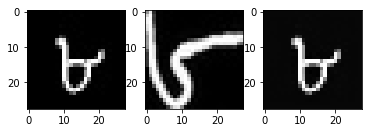

step 32: real_loss: [0.027889734, 0.96875]---fake_loss: [0.010072972, 1.0]---GAN_LOSS: 0.9597276449203491
step 33: real_loss: [0.008997686, 1.0]---fake_loss: [0.006767463, 1.0]---GAN_LOSS: 0.9189476370811462
step 34: real_loss: [0.009734441, 1.0]---fake_loss: [0.036854222, 1.0]---GAN_LOSS: 1.002915859222412
step 35: real_loss: [0.0076867444, 1.0]---fake_loss: [0.006923336, 1.0]---GAN_LOSS: 0.9678279757499695
step 36: real_loss: [0.01802373, 0.96875]---fake_loss: [0.0073418296, 1.0]---GAN_LOSS: 0.8975232243537903
step 37: real_loss: [0.008427743, 1.0]---fake_loss: [0.019921578, 1.0]---GAN_LOSS: 0.9602317214012146
step 38: real_loss: [0.01880354, 1.0]---fake_loss: [0.010221716, 1.0]---GAN_LOSS: 0.8595269918441772
step 39: real_loss: [0.010969929, 1.0]---fake_loss: [0.0066118464, 1.0]---GAN_LOSS: 0.9240461587905884
step 40: real_loss: [0.007879184, 1.0]---fake_loss: [0.032891452, 1.0]---GAN_LOSS: 0.8865475058555603
step 41: real_loss: [0.018479044, 1.0]---fake_loss: [0.007048489, 1.0]---G

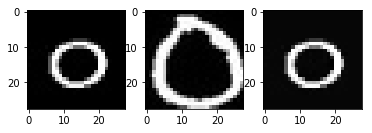

step 42: real_loss: [0.019794516, 1.0]---fake_loss: [0.008120506, 1.0]---GAN_LOSS: 0.8890997767448425
step 43: real_loss: [0.020237785, 1.0]---fake_loss: [0.036995485, 1.0]---GAN_LOSS: 0.8904786109924316
step 44: real_loss: [0.018002447, 1.0]---fake_loss: [0.006559967, 1.0]---GAN_LOSS: 0.8750236630439758
step 45: real_loss: [0.020287633, 1.0]---fake_loss: [0.00877663, 1.0]---GAN_LOSS: 0.9308375120162964
step 46: real_loss: [0.01044082, 1.0]---fake_loss: [0.007122313, 1.0]---GAN_LOSS: 1.1393554210662842
step 47: real_loss: [0.012110252, 1.0]---fake_loss: [0.008675786, 1.0]---GAN_LOSS: 0.9106269478797913
step 48: real_loss: [0.015919803, 1.0]---fake_loss: [0.0064788843, 1.0]---GAN_LOSS: 1.0047662258148193
step 49: real_loss: [0.0074603655, 1.0]---fake_loss: [0.01696475, 1.0]---GAN_LOSS: 0.9459868669509888
step 50: real_loss: [0.0038130544, 1.0]---fake_loss: [0.0072195265, 1.0]---GAN_LOSS: 0.9278678894042969
step 51: real_loss: [0.018859189, 1.0]---fake_loss: [0.0057693766, 1.0]---GAN_LOS

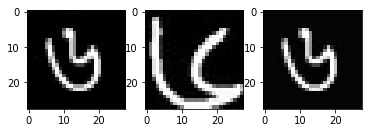

step 52: real_loss: [0.0151709085, 1.0]---fake_loss: [0.0061900127, 1.0]---GAN_LOSS: 1.041648507118225
step 53: real_loss: [0.023179106, 1.0]---fake_loss: [0.0095216185, 1.0]---GAN_LOSS: 0.9212102890014648
step 54: real_loss: [0.008702356, 1.0]---fake_loss: [0.008217291, 1.0]---GAN_LOSS: 1.0193569660186768
step 55: real_loss: [0.009625824, 1.0]---fake_loss: [0.010404708, 1.0]---GAN_LOSS: 0.9286683797836304
step 56: real_loss: [0.008473376, 1.0]---fake_loss: [0.026625995, 1.0]---GAN_LOSS: 0.9602829217910767
step 57: real_loss: [0.008390728, 1.0]---fake_loss: [0.009742405, 1.0]---GAN_LOSS: 0.9964298009872437
step 58: real_loss: [0.009476921, 1.0]---fake_loss: [0.046523906, 1.0]---GAN_LOSS: 0.9533078074455261
step 59: real_loss: [0.01684956, 1.0]---fake_loss: [0.008176075, 1.0]---GAN_LOSS: 0.9803041815757751
step 60: real_loss: [0.008825312, 1.0]---fake_loss: [0.005895003, 1.0]---GAN_LOSS: 0.8708633184432983
step 61: real_loss: [0.04435063, 0.96875]---fake_loss: [0.0054190606, 1.0]---GAN_

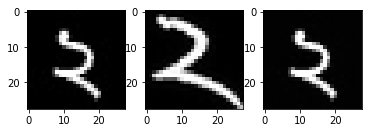

step 62: real_loss: [0.012985977, 1.0]---fake_loss: [0.029665539, 0.96875]---GAN_LOSS: 0.9360026121139526
step 63: real_loss: [0.052020386, 0.96875]---fake_loss: [0.0068770694, 1.0]---GAN_LOSS: 0.9741035103797913
step 64: real_loss: [0.0064309547, 1.0]---fake_loss: [0.018046713, 1.0]---GAN_LOSS: 1.077483892440796
step 65: real_loss: [0.020911328, 1.0]---fake_loss: [0.0071881562, 1.0]---GAN_LOSS: 0.8899976015090942
step 66: real_loss: [0.040212937, 1.0]---fake_loss: [0.010331344, 1.0]---GAN_LOSS: 1.1168895959854126
step 67: real_loss: [0.008411478, 1.0]---fake_loss: [0.011559467, 1.0]---GAN_LOSS: 0.8829200267791748
step 68: real_loss: [0.014173782, 1.0]---fake_loss: [0.01052767, 1.0]---GAN_LOSS: 0.9575188755989075
step 69: real_loss: [0.015009931, 1.0]---fake_loss: [0.012265908, 1.0]---GAN_LOSS: 1.2179268598556519
step 70: real_loss: [0.009855403, 1.0]---fake_loss: [0.07793092, 0.96875]---GAN_LOSS: 0.9780937433242798
step 71: real_loss: [0.009875338, 1.0]---fake_loss: [0.008831277, 1.0]

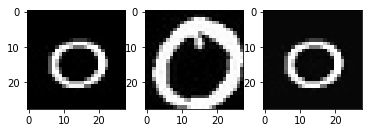

step 72: real_loss: [0.013387457, 1.0]---fake_loss: [0.007298426, 1.0]---GAN_LOSS: 0.951063334941864
step 73: real_loss: [0.007016154, 1.0]---fake_loss: [0.0197213, 1.0]---GAN_LOSS: 1.0786759853363037
step 74: real_loss: [0.0077335103, 1.0]---fake_loss: [0.005594721, 1.0]---GAN_LOSS: 0.9210237860679626
step 75: real_loss: [0.010466939, 1.0]---fake_loss: [0.106547, 0.9375]---GAN_LOSS: 1.0170520544052124
step 76: real_loss: [0.008310361, 1.0]---fake_loss: [0.011339362, 1.0]---GAN_LOSS: 0.9730282425880432
step 77: real_loss: [0.015157101, 1.0]---fake_loss: [0.008336706, 1.0]---GAN_LOSS: 1.0438501834869385
step 78: real_loss: [0.023328312, 1.0]---fake_loss: [0.008843454, 1.0]---GAN_LOSS: 1.0229570865631104
step 79: real_loss: [0.012051887, 1.0]---fake_loss: [0.069879375, 1.0]---GAN_LOSS: 1.0859577655792236
step 80: real_loss: [0.02702196, 1.0]---fake_loss: [0.045665167, 1.0]---GAN_LOSS: 0.9270757436752319
step 81: real_loss: [0.007621454, 1.0]---fake_loss: [0.008485223, 1.0]---GAN_LOSS: 1.

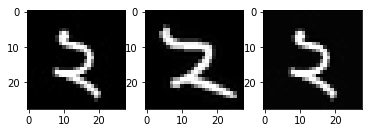

step 82: real_loss: [0.008983538, 1.0]---fake_loss: [0.00589536, 1.0]---GAN_LOSS: 0.8544184565544128
step 83: real_loss: [0.009193908, 1.0]---fake_loss: [0.008548744, 1.0]---GAN_LOSS: 0.9547173976898193
step 84: real_loss: [0.016682591, 1.0]---fake_loss: [0.020548118, 1.0]---GAN_LOSS: 0.9038779735565186
step 85: real_loss: [0.008324185, 1.0]---fake_loss: [0.0064057764, 1.0]---GAN_LOSS: 0.8956618309020996
step 86: real_loss: [0.0038612983, 1.0]---fake_loss: [0.008072326, 1.0]---GAN_LOSS: 0.9576969742774963
step 87: real_loss: [0.0074605076, 1.0]---fake_loss: [0.009156199, 1.0]---GAN_LOSS: 0.928159236907959
step 88: real_loss: [0.008152152, 1.0]---fake_loss: [0.01847106, 1.0]---GAN_LOSS: 0.9438470005989075
step 89: real_loss: [0.008026581, 1.0]---fake_loss: [0.008594358, 1.0]---GAN_LOSS: 0.9187689423561096
step 90: real_loss: [0.006605724, 1.0]---fake_loss: [0.009782363, 1.0]---GAN_LOSS: 0.9428250193595886
step 91: real_loss: [0.007906233, 1.0]---fake_loss: [0.008639914, 1.0]---GAN_LOSS:

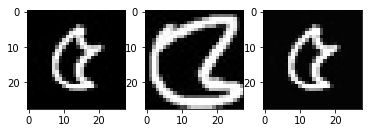

step 92: real_loss: [0.0118870735, 1.0]---fake_loss: [0.01246723, 1.0]---GAN_LOSS: 0.9606447219848633
step 93: real_loss: [0.007980298, 1.0]---fake_loss: [0.007155438, 1.0]---GAN_LOSS: 0.8820202350616455
Found 2980 images belonging to 10 classes.
step 1: real_loss: [0.008150773, 1.0]---fake_loss: [0.027966172, 1.0]---GAN_LOSS: 1.1644943952560425


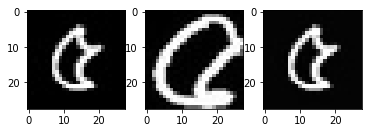

step 2: real_loss: [0.0068498384, 1.0]---fake_loss: [0.044015452, 1.0]---GAN_LOSS: 1.1276642084121704
step 3: real_loss: [0.0064600734, 1.0]---fake_loss: [0.009920055, 1.0]---GAN_LOSS: 0.94942706823349
step 4: real_loss: [0.006518566, 1.0]---fake_loss: [0.005888465, 1.0]---GAN_LOSS: 0.912988007068634
step 5: real_loss: [0.015864313, 1.0]---fake_loss: [0.004546594, 1.0]---GAN_LOSS: 0.9471026062965393
step 6: real_loss: [0.015800271, 1.0]---fake_loss: [0.09003119, 0.96875]---GAN_LOSS: 1.101135492324829
step 7: real_loss: [0.014513419, 1.0]---fake_loss: [0.009537319, 1.0]---GAN_LOSS: 0.9443901181221008
step 8: real_loss: [0.009577489, 1.0]---fake_loss: [0.0070173787, 1.0]---GAN_LOSS: 0.9579282999038696
step 9: real_loss: [0.015568538, 1.0]---fake_loss: [0.0058373855, 1.0]---GAN_LOSS: 1.1376477479934692
step 10: real_loss: [0.0125019625, 1.0]---fake_loss: [0.0071777385, 1.0]---GAN_LOSS: 1.086050271987915
step 11: real_loss: [0.01097293, 1.0]---fake_loss: [0.0068321517, 1.0]---GAN_LOSS: 0.8

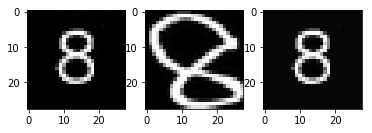

step 12: real_loss: [0.009585295, 1.0]---fake_loss: [0.010633647, 1.0]---GAN_LOSS: 0.9056429862976074
step 13: real_loss: [0.007753, 1.0]---fake_loss: [0.015722523, 1.0]---GAN_LOSS: 0.8838874697685242
step 14: real_loss: [0.03633093, 1.0]---fake_loss: [0.008165429, 1.0]---GAN_LOSS: 0.9515293836593628
step 15: real_loss: [0.0148942685, 1.0]---fake_loss: [0.007231149, 1.0]---GAN_LOSS: 0.8694077730178833
step 16: real_loss: [0.007644343, 1.0]---fake_loss: [0.006821161, 1.0]---GAN_LOSS: 0.9178142547607422
step 17: real_loss: [0.009704908, 1.0]---fake_loss: [0.012560566, 1.0]---GAN_LOSS: 1.0849857330322266
step 18: real_loss: [0.0085241515, 1.0]---fake_loss: [0.008187457, 1.0]---GAN_LOSS: 0.9786625504493713
step 19: real_loss: [0.024666341, 1.0]---fake_loss: [0.0057651605, 1.0]---GAN_LOSS: 0.9176090955734253
step 20: real_loss: [0.014632523, 1.0]---fake_loss: [0.007360018, 1.0]---GAN_LOSS: 0.9864247441291809
step 21: real_loss: [0.016215328, 1.0]---fake_loss: [0.006410514, 1.0]---GAN_LOSS: 

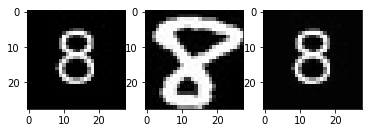

step 22: real_loss: [0.013157417, 1.0]---fake_loss: [0.008150861, 1.0]---GAN_LOSS: 0.9525681138038635
step 23: real_loss: [0.008424325, 1.0]---fake_loss: [0.005279118, 1.0]---GAN_LOSS: 0.9827185273170471
step 24: real_loss: [0.009471002, 1.0]---fake_loss: [0.011695668, 1.0]---GAN_LOSS: 0.9033023118972778
step 25: real_loss: [0.012092138, 1.0]---fake_loss: [0.0066698855, 1.0]---GAN_LOSS: 0.9333078265190125
step 26: real_loss: [0.018287325, 1.0]---fake_loss: [0.004668306, 1.0]---GAN_LOSS: 0.9512631297111511
step 27: real_loss: [0.01955868, 1.0]---fake_loss: [0.010342137, 1.0]---GAN_LOSS: 1.0552456378936768
step 28: real_loss: [0.016804492, 1.0]---fake_loss: [0.0057250536, 1.0]---GAN_LOSS: 0.8713182210922241
step 29: real_loss: [0.011926202, 1.0]---fake_loss: [0.0059497636, 1.0]---GAN_LOSS: 0.8762776851654053
step 30: real_loss: [0.017627802, 1.0]---fake_loss: [0.006940008, 1.0]---GAN_LOSS: 0.8856270909309387
step 31: real_loss: [0.008134518, 1.0]---fake_loss: [0.0062481863, 1.0]---GAN_LO

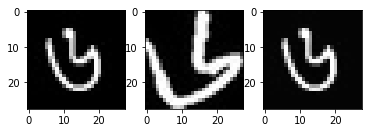

step 32: real_loss: [0.005057751, 1.0]---fake_loss: [0.006784473, 1.0]---GAN_LOSS: 1.000540852546692
step 33: real_loss: [0.008673515, 1.0]---fake_loss: [0.0059151, 1.0]---GAN_LOSS: 0.9419118762016296
step 34: real_loss: [0.01336537, 1.0]---fake_loss: [0.0071670515, 1.0]---GAN_LOSS: 0.9298995137214661
step 35: real_loss: [0.007856574, 1.0]---fake_loss: [0.007139129, 1.0]---GAN_LOSS: 0.9631326794624329
step 36: real_loss: [0.007451497, 1.0]---fake_loss: [0.02985226, 1.0]---GAN_LOSS: 0.8774750828742981
step 37: real_loss: [0.012154724, 1.0]---fake_loss: [0.006537034, 1.0]---GAN_LOSS: 0.9108825922012329
step 38: real_loss: [0.013329521, 1.0]---fake_loss: [0.015847964, 1.0]---GAN_LOSS: 0.9396032094955444
step 39: real_loss: [0.010686662, 1.0]---fake_loss: [0.01636932, 1.0]---GAN_LOSS: 0.9074469804763794
step 40: real_loss: [0.011687864, 1.0]---fake_loss: [0.007970247, 1.0]---GAN_LOSS: 0.9242761135101318
step 41: real_loss: [0.018925445, 1.0]---fake_loss: [0.008203778, 1.0]---GAN_LOSS: 0.98

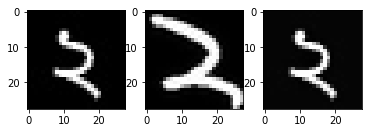

step 42: real_loss: [0.011723208, 1.0]---fake_loss: [0.0065495945, 1.0]---GAN_LOSS: 0.8741142749786377
step 43: real_loss: [0.00739169, 1.0]---fake_loss: [0.013707219, 1.0]---GAN_LOSS: 1.0040267705917358
step 44: real_loss: [0.008936381, 1.0]---fake_loss: [0.00814603, 1.0]---GAN_LOSS: 0.9105863571166992
step 45: real_loss: [0.013740363, 1.0]---fake_loss: [0.0072938874, 1.0]---GAN_LOSS: 1.0313798189163208
step 46: real_loss: [0.008025782, 1.0]---fake_loss: [0.008837251, 1.0]---GAN_LOSS: 0.8957319855690002
step 47: real_loss: [0.010196079, 1.0]---fake_loss: [0.0073619885, 1.0]---GAN_LOSS: 0.9122379422187805
step 48: real_loss: [0.01119253, 1.0]---fake_loss: [0.007190736, 1.0]---GAN_LOSS: 1.1023856401443481
step 49: real_loss: [0.13339931, 0.875]---fake_loss: [0.008513069, 1.0]---GAN_LOSS: 0.9361249208450317
step 50: real_loss: [0.011108978, 1.0]---fake_loss: [0.006818017, 1.0]---GAN_LOSS: 1.2714349031448364
step 51: real_loss: [0.008564815, 1.0]---fake_loss: [0.0053057866, 1.0]---GAN_LOS

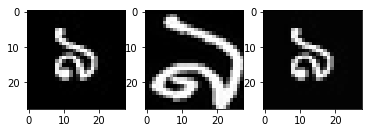

step 52: real_loss: [0.010597861, 1.0]---fake_loss: [0.0076988847, 1.0]---GAN_LOSS: 0.9311652779579163
step 53: real_loss: [0.014914006, 1.0]---fake_loss: [0.010228869, 1.0]---GAN_LOSS: 1.0871254205703735
step 54: real_loss: [0.007376295, 1.0]---fake_loss: [0.01867744, 1.0]---GAN_LOSS: 0.9271597862243652
step 55: real_loss: [0.010846534, 1.0]---fake_loss: [0.019367572, 1.0]---GAN_LOSS: 0.8943474888801575
step 56: real_loss: [0.009168905, 1.0]---fake_loss: [0.009306235, 1.0]---GAN_LOSS: 0.9317073225975037
step 57: real_loss: [0.010853484, 1.0]---fake_loss: [0.01913666, 0.96875]---GAN_LOSS: 0.9030084609985352
step 58: real_loss: [0.014461087, 1.0]---fake_loss: [0.011332853, 1.0]---GAN_LOSS: 0.8856938481330872
step 59: real_loss: [0.010168759, 1.0]---fake_loss: [0.01607938, 1.0]---GAN_LOSS: 0.891161322593689
step 60: real_loss: [0.047239613, 0.96875]---fake_loss: [0.00862216, 1.0]---GAN_LOSS: 0.937333881855011
step 61: real_loss: [0.012470251, 1.0]---fake_loss: [0.010007517, 1.0]---GAN_LO

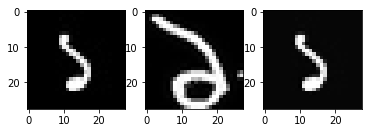

step 62: real_loss: [0.005435084, 1.0]---fake_loss: [0.00575837, 1.0]---GAN_LOSS: 0.8528701066970825
step 63: real_loss: [0.009280525, 1.0]---fake_loss: [0.0076519093, 1.0]---GAN_LOSS: 0.8850314617156982
step 64: real_loss: [0.0040702554, 1.0]---fake_loss: [0.009940412, 1.0]---GAN_LOSS: 0.9417915940284729
step 65: real_loss: [0.021477617, 1.0]---fake_loss: [0.009363719, 1.0]---GAN_LOSS: 0.9529325366020203
step 66: real_loss: [0.009686696, 1.0]---fake_loss: [0.0069345515, 1.0]---GAN_LOSS: 0.924717903137207
step 67: real_loss: [0.01094906, 1.0]---fake_loss: [0.008802252, 1.0]---GAN_LOSS: 0.9135220646858215
step 68: real_loss: [0.0060397163, 1.0]---fake_loss: [0.07372283, 1.0]---GAN_LOSS: 0.9199727773666382
step 69: real_loss: [0.008394881, 1.0]---fake_loss: [0.017842473, 1.0]---GAN_LOSS: 0.9129388928413391
step 70: real_loss: [0.008910464, 1.0]---fake_loss: [0.009894857, 1.0]---GAN_LOSS: 0.8830676674842834
step 71: real_loss: [0.010468759, 1.0]---fake_loss: [0.0070950063, 1.0]---GAN_LOSS

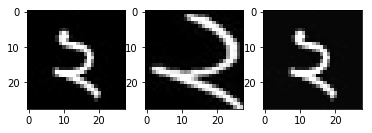

step 72: real_loss: [0.011077503, 1.0]---fake_loss: [0.009819607, 1.0]---GAN_LOSS: 1.0186210870742798
step 73: real_loss: [0.011435412, 1.0]---fake_loss: [0.00498682, 1.0]---GAN_LOSS: 0.9978000521659851
step 74: real_loss: [0.009036832, 1.0]---fake_loss: [0.009453389, 1.0]---GAN_LOSS: 0.9220175743103027
step 75: real_loss: [0.016387466, 1.0]---fake_loss: [0.011092058, 1.0]---GAN_LOSS: 0.9045135378837585
step 76: real_loss: [0.005913761, 1.0]---fake_loss: [0.012815949, 1.0]---GAN_LOSS: 0.8831152319908142
step 77: real_loss: [0.009683517, 1.0]---fake_loss: [0.0059366445, 1.0]---GAN_LOSS: 1.0100500583648682
step 78: real_loss: [0.010605299, 1.0]---fake_loss: [0.010713834, 1.0]---GAN_LOSS: 0.8635855913162231
step 79: real_loss: [0.0074913134, 1.0]---fake_loss: [0.0057076598, 1.0]---GAN_LOSS: 0.8927565813064575
step 80: real_loss: [0.009600496, 1.0]---fake_loss: [0.008302103, 1.0]---GAN_LOSS: 0.9341199994087219
step 81: real_loss: [0.005957921, 1.0]---fake_loss: [0.009715738, 1.0]---GAN_LOS

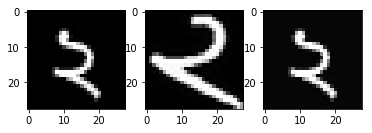

step 82: real_loss: [0.013410903, 1.0]---fake_loss: [0.0075040213, 1.0]---GAN_LOSS: 0.8804645538330078
step 83: real_loss: [0.008654581, 1.0]---fake_loss: [0.006645041, 1.0]---GAN_LOSS: 0.9456683993339539
step 84: real_loss: [0.011025225, 1.0]---fake_loss: [0.0069147823, 1.0]---GAN_LOSS: 0.9531337022781372
step 85: real_loss: [0.009348187, 1.0]---fake_loss: [0.017311068, 1.0]---GAN_LOSS: 0.9429833292961121
step 86: real_loss: [0.0072805416, 1.0]---fake_loss: [0.007542695, 1.0]---GAN_LOSS: 0.9268254041671753
step 87: real_loss: [0.0074370783, 1.0]---fake_loss: [0.018342238, 1.0]---GAN_LOSS: 0.8875316381454468
step 88: real_loss: [0.007022612, 1.0]---fake_loss: [0.011808621, 1.0]---GAN_LOSS: 0.900937557220459
step 89: real_loss: [0.007894352, 1.0]---fake_loss: [0.013911959, 1.0]---GAN_LOSS: 0.8820626735687256


KeyboardInterrupt: 

In [22]:
for j in range(100):
    training_set = train_datagen.flow_from_directory(path,
                                                target_size=(28,56),
                                                class_mode = 'categorical',
                                                shuffle=True,color_mode='grayscale')
    
    for i in range(I):
        #generating real sample
        [real_hand,real_print],real_label = generat_real_samples()
        #generating fake sample
        fake_print,fake_label = generate_fake_samples(generator,real_hand)
        #update discriminator for real sample
        d_loss1 = discriminator.train_on_batch([real_hand,real_print,], real_label)
        #update discriminator for fake sample
        d_loss2 = discriminator.train_on_batch([fake_print,real_print,], fake_label)
        # update the generator
        g_loss, _, _ = gan_model.train_on_batch(real_hand, [real_label, real_print])
        #print performance
        print("step {}: real_loss: {}---fake_loss: {}---GAN_LOSS: {}".format(i+1, d_loss1,d_loss2,g_loss))
        if i % 10 == 0:
            #filename = '/GAN/model_%06d' % (i+1)
            #g_model.save(filename+'gan.h5')
            #generator.save(filename+'generator.h5')
            #discriminator.save(filename+'discriminator.h5')
            a = np.random.randint(1,30)
            i = real_print[a]
            j = np.reshape(i,(28,28))
            plt.subplot(1,3,1)
            plt.imshow(j,cmap='gray')
            i = real_hand[a]
            j = np.reshape(i,(28,28))
            plt.subplot(1,3,2)
            plt.imshow(j,cmap='gray')
            i = fake_print[a]
            j = np.reshape(i,(28,28))
            plt.subplot(1,3,3)
            plt.imshow(j,cmap='gray')
            plt.show()
        

Found 2980 images belonging to 10 classes.


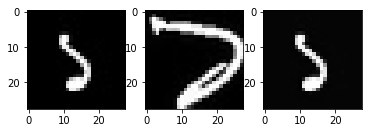

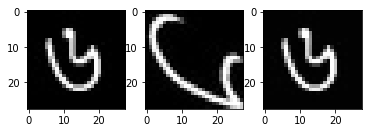

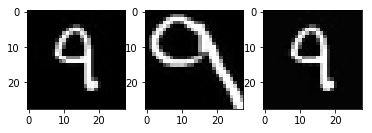

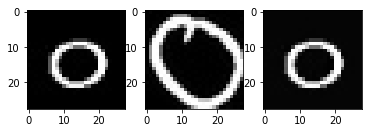

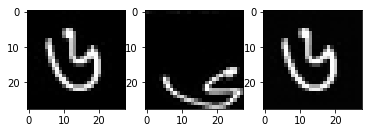

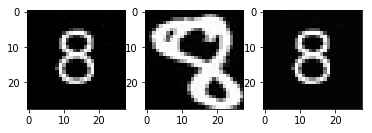

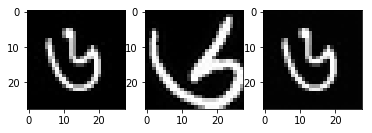

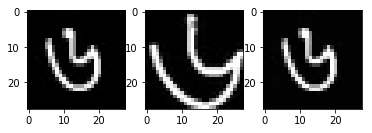

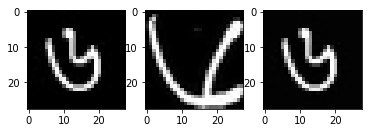

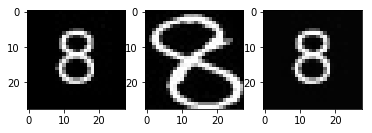

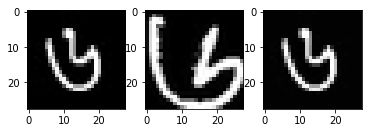

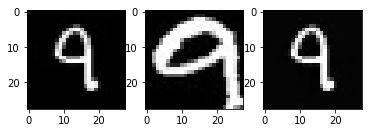

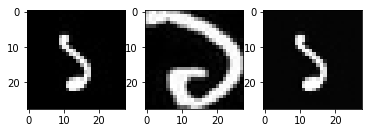

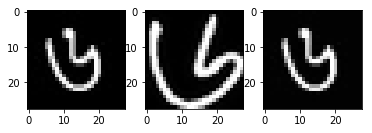

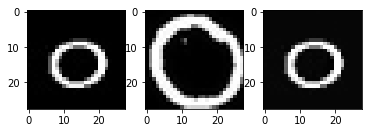

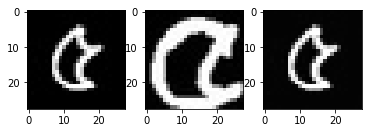

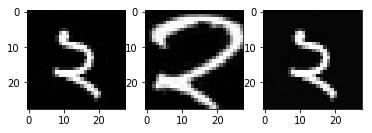

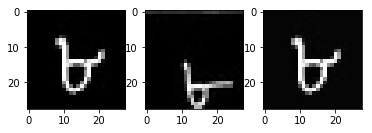

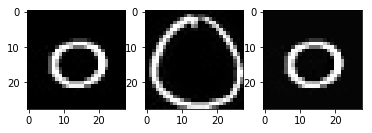

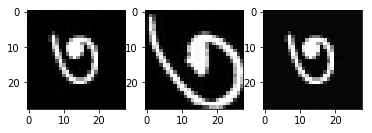

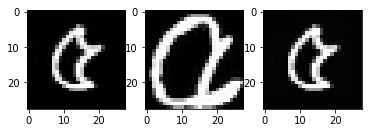

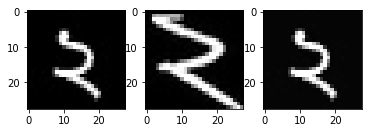

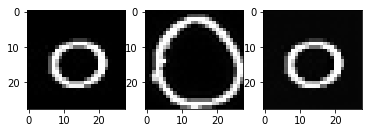

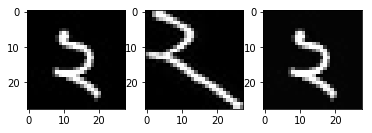

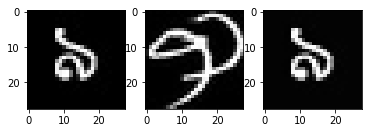

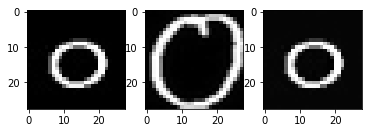

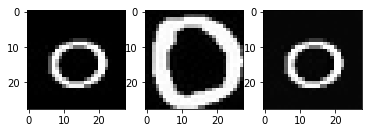

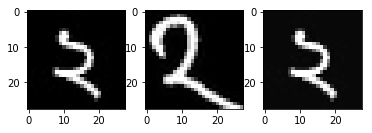

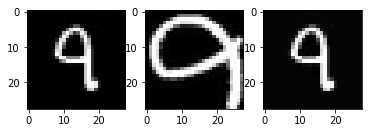

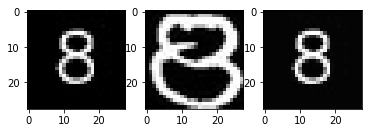

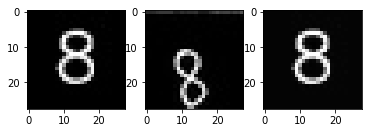

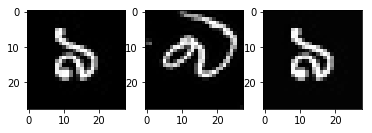

In [25]:

training_set = train_datagen.flow_from_directory(path,
                                            target_size=(28,56),
                                            class_mode = 'categorical',
                                            shuffle=True,color_mode='grayscale')
[real_hand,real_print],real_label = generat_real_samples()
fake_print,fake_label = generate_fake_samples(generator,real_hand)
for a in range(32):
    i = real_print[a]
    j = np.reshape(i,(28,28))
    plt.subplot(1,3,1)
    plt.imshow(j,cmap='gray')
    i = real_hand[a]
    j = np.reshape(i,(28,28))
    plt.subplot(1,3,2)
    plt.imshow(j,cmap='gray')
    i = fake_print[a]
    j = np.reshape(i,(28,28))
    plt.subplot(1,3,3)
    plt.imshow(j,cmap='gray')
    plt.show()
    

In [38]:
#filename = '/GAN/model_%06d' % (i+1)
gan_model.save('gan_model.h5')
generator.save('generator.h5')
discriminator.save('discriminator.h5')

In [39]:
pwd

'/kaggle'

In [42]:
ls

config/  discriminator.h5  gan_model.h5  generator.h5  input/  lib/  working/


In [45]:
from IPython.display import FileLink
FileLink(r'/kaggle/gan_model.h5')

ValueError: Cannot display a directory using FileLink. Use FileLinks to display '/kaggle'.